In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [3]:
im=cv2.imread('./im.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im.shape

(1200, 1920, 3)

In [7]:
r=200
c=int((im.shape[1]/im.shape[0])*r)
img=(cv2.resize(im,(c,r)))
img.shape

(200, 320, 3)

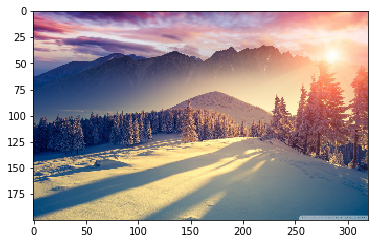

In [8]:
plt.imshow(img)
plt.show()

In [9]:
data=np.reshape(img,(-1,3))
data.shape

(64000, 3)

In [10]:
from sklearn.cluster import KMeanseans

In [11]:
km=KMeans(n_clusters=8)


In [12]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
centroids=np.array(km.cluster_centers_,dtype=np.uint8)


In [15]:
print(centroids.shape)
print(centroids)

(8, 3)
[[246 218 181]
 [115 119 134]
 [ 27  46  89]
 [225 180 137]
 [195 165 182]
 [ 64  85 119]
 [174 139 131]
 [135  83  90]]


In [17]:
print(km.labels_.shape)
print(km.labels_.dtype)

(64000,)
int32


In [19]:
freq=np.unique(km.labels_,return_counts=True)
freq

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 9536,  9705,  7424,  7930,  4921,  9085, 10088,  5311],
       dtype=int64))

In [23]:
label=freq[1].argmax()

In [24]:
dom_color=np.zeros((20,20,3),dtype=np.uint8)

In [37]:
255-centroids[label]

array([ 81, 116, 124], dtype=uint8)

In [40]:
dom_color[:,:,:]=centroids[label]

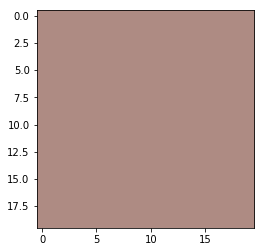

In [41]:
plt.imshow(dom_color)
plt.show()

In [45]:
freq_ratio=freq[1]/freq[1].sum()

In [55]:
info=[]
for ix in range(freq_ratio.shape[0]):
    info.append((centroids[ix],freq_ratio[ix]))
for cx in info:
    print( cx)

(array([246, 218, 181], dtype=uint8), 0.149)
(array([115, 119, 134], dtype=uint8), 0.151640625)
(array([27, 46, 89], dtype=uint8), 0.116)
(array([225, 180, 137], dtype=uint8), 0.12390625)
(array([195, 165, 182], dtype=uint8), 0.076890625)
(array([ 64,  85, 119], dtype=uint8), 0.141953125)
(array([174, 139, 131], dtype=uint8), 0.157625)
(array([135,  83,  90], dtype=uint8), 0.082984375)


In [56]:
sorted_info=sorted(info,key=lambda z:z[1],reverse=True)
for cx in sorted_info:
    print (cx)

(array([174, 139, 131], dtype=uint8), 0.157625)
(array([115, 119, 134], dtype=uint8), 0.151640625)
(array([246, 218, 181], dtype=uint8), 0.149)
(array([ 64,  85, 119], dtype=uint8), 0.141953125)
(array([225, 180, 137], dtype=uint8), 0.12390625)
(array([27, 46, 89], dtype=uint8), 0.116)
(array([135,  83,  90], dtype=uint8), 0.082984375)
(array([195, 165, 182], dtype=uint8), 0.076890625)


In [60]:
print (len(sorted_info))
print (sorted_info[3][1])

8
0.141953125


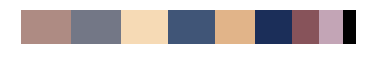

In [63]:
print_matrix = np.ones((10,100,3), dtype=np.uint8)
start = 0
for ix in range(len(sorted_info)):
    color = sorted_info[ix][0]
    width = int(sorted_info[ix][1]*print_matrix.shape[1])
    end = start + width
    print_matrix[:, start:end, :] = color
    start = end
    plt.axis('off')
    plt.imshow(print_matrix)
plt.show()

In [71]:
m=np.ones((100,100,3),dtype=np.uint8)
start=0
end=0
for ix in range(len(sorted_info)):
    end=end+int(sorted_info[ix][1]*100)
    m[:,start:end ,:]=255-sorted_info[ix][0]
    start=end

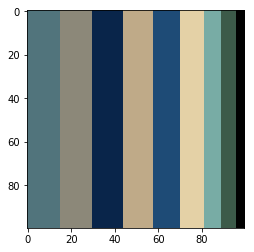

In [72]:
plt.imshow(m)
plt.show()